## [대출자들의 채무 상환]
상환 여부를 예측하기 위한 로지스틱 회귀분석을 실시하고 결과를 해석하시오.

#### step 01. 패키지 불러오기

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= 'Malgun Gothic')
import warnings
warnings.filterwarnings('ignore')

#### step 02. 데이터 구성하기

In [6]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2_py/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
BAD        3748 non-null int64
LOAN       3748 non-null int64
MORTDUE    3748 non-null int64
VALUE      3748 non-null float64
REASON     3748 non-null object
JOB        3748 non-null object
YOJ        3748 non-null float64
DEROG      3748 non-null int64
DELINQ     3748 non-null float64
CLAGE      3748 non-null float64
NINQ       3748 non-null float64
CLNO       3748 non-null int64
DEBTINC    3748 non-null float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.7+ KB


#### step 03. 데이터 전처리 - 결측치 처리

In [7]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [8]:
#JOB 변수의 결측치는 other 로 대체
df_raw['JOB'].fillna('Other', inplace = True) #fillna 함수 적용 후 df_raw 데이터에 저장 : inplace = True

#숫자형 변수의 결측치는 평균값 입력
df_raw.fillna(df_raw.mean(), inplace=True)

In [9]:
df_raw.isnull().sum() #확인절차

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [11]:
#데이터 분할
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)
print('train data size : {}' .format(df_train.shape))
print('test data size : {}' .format(df_test.shape))

train data size : (2623, 13)
test data size : (1125, 13)


#### step 4. 모델 및 회귀계수 검토

In [17]:
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON)
+ C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)
# 범주형 변수 표시 : C

log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.2257
Time:                        11:34:42   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
                                        LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

No.Observations(전체 자료 수) : 2,623

Df Residuals(잔차 자유도) : 2,606

Df Model(모델 자유도) : 16

설명력 : 0.2257 -> *설명력이 낮음*

#### step 05. 예측 및 성능 평가

In [15]:
#test 데이터 예측
y_pred = log_result.predict(df_test)

#0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int) #type 지정 정수형으로 하겠다!
y_pred_class.head()

1721    0
822     0
1686    0
789     0
165     0
dtype: int64

In [19]:
y_pred.head()

1721    0.103803
822     0.028356
1686    0.360934
789     0.007546
165     0.146117
dtype: float64

In [16]:
#실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print('Accuracy: {0:.3f}\n'.format(accuracy_score(df_test['BAD'], y_pred_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test['BAD'],y_pred_class)))

Accuracy: 0.924

Confusion Matrix:
[[1017    4]
 [  81   23]]


*Confusion matrix : 예측이 열레이블, 실제가 행레이블이라고 생각하면 된다!*

모델의 정분류율은 92.4%

실제값이 0인데 0으로 분류가 된 데이터는 1,017건

실제값이 1인데 0으로 분류가 된 데이터는 81건


####  step 06. 결론 도출 

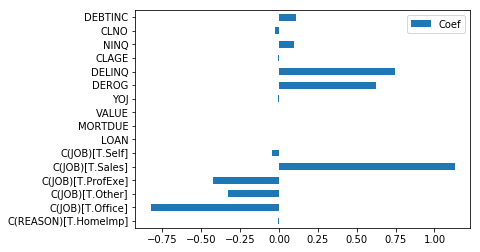

In [18]:
#설명변수 중요도
df_logistic_coef = pd.DataFrame({'Coef': log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')

In [22]:
#표준화 회귀 계수

df_char = df_raw.select_dtypes(include = 'object') #object만 선택
df_numeric = df_raw.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


BAD 변수도 함께 scale 처리 된다.

In [23]:
df_scaled['BAD'] = np.where(df_scaled['BAD']>0, 1, 0) #np.where : 조건
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


BAD 데이터를 0과 1로 변환

In [25]:
#데이터분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size =0.3, random_state=1234)

In [26]:
scaled_log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON)
+ C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_scaled_train)

scaled_log_result = scaled_log_model.fit()

print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.2257
Time:                        12:13:00   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
                                        LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4815      0.205    -12.111      0.000      -2.883      -2.080

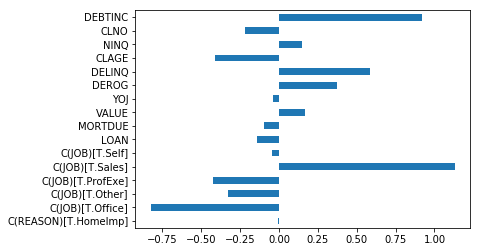

In [27]:
#설명변수 중요도
df_log_scaled_coef = pd.DataFrame({'Coef':scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='Coef',legend=False)

### [실습] 통신회사의 고객 이탈
고객의 이탈 여부를 예측하기 위한 로지스틱 분석을 실시하고 결과를 해석하시오.
#### step 1 . 데이터 구성하기

In [80]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2_py/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


#### step 2. 데이터 전처리

In [81]:
df_raw.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

결측치 없음.

#### 명목형 변수들의 distinct한 값의 수 (왜 범주형 데이터의 unique 값을 알고자 하는가?)
#### for loop을 어떻게 작성하는가?

In [83]:
#명목형 변수 목록
obj_cols = df_raw.select_dtypes('object').columns
for col in obj_cols :
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

CHURN : 2
CUSTOMER_ID : 930
GENDER : 2
CHARGE_TYPE : 5
HANDSET : 11
USAGE_BAND : 6


In [84]:
df_raw['CHURN'] = np.where(df_raw['CHURN'] == 'Active',0,1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [85]:
df_raw['CHURN'].value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [86]:
#데이터 분할
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)
print('train data size : {}' .format(df_train.shape))
print('test data size : {}' .format(df_test.shape))

train data size : (651, 15)
test data size : (279, 15)


In [87]:
log_model = Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND)
+ SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME
+ TOTAL_CALLS_NO + TOTAL_CALLS_TIME""", df_train)
# CUSTOMER_ID 제외 : ID를 넣어주면 이 ID의 사람은 이탈, 유지 등을 암기해버린다. 따라서 제거!

log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.5059
Time:                        14:12:25   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
                                        LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -24.1056   2065.436     -0.012      0.991   -4072.286    4024.075
C(GENDER)[T.M]   

In [88]:
#test 데이터 예측
y_pred = log_result.predict(df_test)

#0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int) #type 지정 정수형으로 하겠다!
y_pred_class.head()

530    0
534    0
699    0
641    0
319    0
dtype: int64

In [89]:
y_pred.head()

530    1.083588e-01
534    2.688294e-01
699    2.779741e-16
641    6.389340e-02
319    1.982053e-01
dtype: float64

In [90]:
#실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print('Accuracy: {0:.3f}\n'.format(accuracy_score(df_test['CHURN'], y_pred_class)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test['CHURN'],y_pred_class)))

Accuracy: 0.914

Confusion Matrix:
[[227   8]
 [ 16  28]]


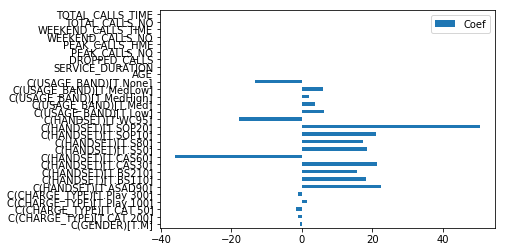

In [91]:
#설명변수 중요도
df_logistic_coef = pd.DataFrame({'Coef': log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')

In [92]:
#표준화 회귀 계수

df_char = df_raw.select_dtypes(include = 'object') #object만 선택
df_numeric = df_raw.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,-0.489898,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,K102990,F,CAT 100,ASAD170,Med
1,-0.489898,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,K103280,M,CAT 100,S50,Med
2,-0.489898,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,K103660,M,CAT 100,ASAD170,Med
3,-0.489898,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,K103730,M,CAT 100,ASAD170,Med
4,-0.489898,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,K104560,F,CAT 100,S50,Med


In [93]:
df_scaled['CHURN'] = np.where(df_scaled['CHURN']>0, 1, 0) #np.where : 조건
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,K102990,F,CAT 100,ASAD170,Med
1,0,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,K103280,M,CAT 100,S50,Med
2,0,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,K103660,M,CAT 100,ASAD170,Med
3,0,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,K103730,M,CAT 100,ASAD170,Med
4,0,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,K104560,F,CAT 100,S50,Med


In [94]:
#데이터분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size =0.3, random_state=1234)

In [95]:
scaled_log_model = Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND)
+ SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME
+ TOTAL_CALLS_NO + TOTAL_CALLS_TIME""", df_scaled_train)

scaled_log_result = scaled_log_model.fit()

print(scaled_log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.5059
Time:                        14:17:57   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
                                        LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -22.6857   2065.401     -0.011      0.991   -4070.798    4025.427
C(GENDER)[T.M]   

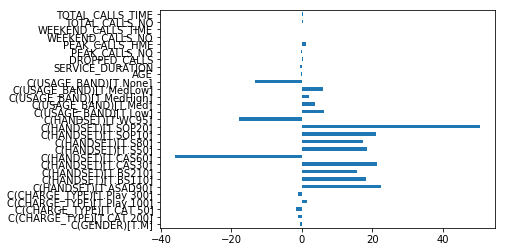

In [96]:
#설명변수 중요도
df_log_scaled_coef = pd.DataFrame({'Coef':scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='Coef',legend=False)